In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [177]:
n2 = 10
m = 12

A = np.eye(n)*np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [3]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x, i : A[i] * ( A[i].T @ x - b[i])

In [86]:
def SAGA(x0, grad, func, m):    
    xk = x0
    y = [grad(xk, i) for i in range(n)]
    sum_y = sum(y)
    L = max(np.linalg.eigh(A.T @ A)[0])
    print(L)
    hk = 1 / (3 * L)
    res = [func(xk)]
    for i in range(1, m):
        j = np.random.randint(1, n)
        sum_y -= y[j]
        sum_y += grad(xk, j)
        xk = xk - hk * (grad(xk, j) - y[j] + sum_y / n)
        res.append(func(xk))
        y[j] = grad(xk, j)
        #i=+1
        #if abs(res[-1] - res[-2]) < 1e-8:
    return res

In [173]:
def RMS(x, a, b, i, delta, t, grad, v = 0):
    for idx in range(1, t):
        g = grad(x)
        v = b * v  + (1 - b) * (g * g)
        
        e = delta / np.sqrt(idx)
        a_new = a / np.sqrt(idx)        
        
        A = np.diag(np.sqrt(v)) + e * np.eye(len(v))
        x = x - a_new * np.linalg.inv(A) @ g
    return x

def GetStep(v, idx, gr, alpha = 0.003, beta = 0.9, delta = 1):
    v = beta * v + (1 - beta) * (gr * gr)
    eps = delta / np.sqrt(idx)
    alpha_new = alpha / np.sqrt(idx)
    A = np.diag(np.sqrt(v)) + eps * np.eye(len(v))
    hk = alpha_new * np.linalg.inv(A)
    return hk
    
def SAGAnew(x0, grad, func, itern):    
    xk = x0
    y = [grad(xk, i) for i in range(n)]
    sum_y = sum(y)
    v = np.zeros((n, n2))
    res = [func(xk)]
    
    for idx in range(1, itern):
        j = np.random.randint(1, n)
        
        sum_y -= y[j]
        gr = grad(xk, j)
        sum_y += gr
        
        #get step
        hk = GetStep(v[j], idx, gr)
        
        xk = xk - hk @ (gr - y[j] + sum_y / n)
        res.append(func(xk))
        y[j] = grad(xk, j)
    return res

In [175]:
m = 5000
res = SAGA(x0, grad, func, m)
res1 = SAGAnew(x0, grad, func, m)
#print(res)


100.0


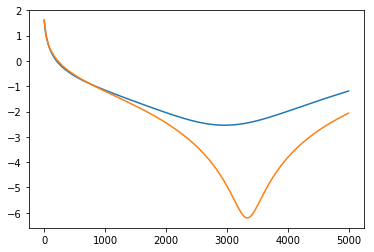

In [176]:
plt.plot(np.log(res))
plt.plot(np.log(res1))
plt.show()
# A = np.array([[i + j + 1 for i in range(1, 11)] for j in range(1, 11)])

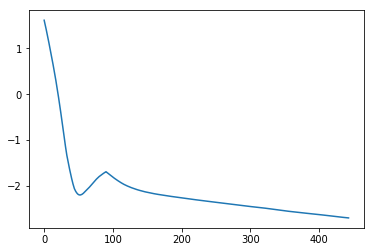

In [11]:
plt.plot(np.log(res))
plt.show()
#A = np.array([[max(i, j) + 1 for i in range(1, 11)] for j in range(1, 11)])

In [123]:
np.exp(-10)

4.5399929762484854e-05

In [ ]:
plt.plot(np.log(res))
plt.show()
#A = np.array([[1 / (i + j + 1)  for i in range(10)] for j in range(10)])

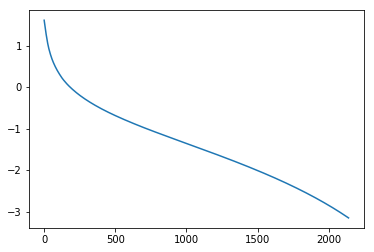

In [20]:
plt.plot(np.log(res))
plt.show()
#A = np.eye(n)*np.arange(1,11)